# import

In [31]:
import cv2
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 이미지 파일 경로

In [17]:
real_image_paths = [f'../train/real_images/real_{str(i).zfill(5)}.png' for i in range(10000)]
fake_image_paths = [f'../train/fake_images/fake_{str(i).zfill(5)}.png' for i in range(10000)]

# 해상도 값

In [12]:
def get_unique_resolutions(image_paths):
    resolutions = []  # 해상도를 저장하기 위한 list
    for path in image_paths:
        image = cv2.imread(path)
        if image is not None:
            # 이미지의 해상도 (높이 x 너비)를 가져와서 list에 추가
            resolutions.append((image.shape[0], image.shape[1]))
    return list(set(resolutions)), Counter(resolutions)

# 유니크한 해상도를 가져오고 출력
unique_real_resolutions, real_resolution_counts = get_unique_resolutions(real_image_paths)
unique_fake_resolutions, fake_resolution_counts = get_unique_resolutions(fake_image_paths)

In [13]:
print(f'유니크한 real images의 해상도: {unique_real_resolutions}')
print(f'real images의 해상도 종류 수: {len(unique_real_resolutions)}')
print(f'Unique resolutions in fake images: {unique_fake_resolutions}')
print(f'fake images의 해상도 종류 수: {len(unique_fake_resolutions)}')

유니크한 real images의 해상도: [(408, 416), (416, 408), (448, 296), (496, 312), (272, 336), (448, 424), (496, 376), (176, 240), (352, 472), (496, 440), (208, 272), (376, 448), (336, 448), (264, 416), (472, 320), (400, 496), (376, 496), (336, 432), (360, 496), (336, 496), (264, 400), (176, 144), (472, 496), (432, 432), (360, 480), (312, 440), (432, 496), (288, 440), (344, 456), (400, 400), (368, 496), (256, 352), (184, 248), (312, 232), (432, 288), (328, 496), (312, 424), (344, 248), (384, 440), (224, 320), (296, 400), (496, 336), (352, 496), (496, 400), (496, 464), (256, 400), (280, 376), (464, 304), (344, 296), (224, 304), (352, 288), (464, 496), (352, 352), (496, 320), (296, 448), (256, 256), (496, 384), (368, 464), (424, 496), (480, 312), (256, 384), (496, 448), (280, 424), (240, 296), (240, 360), (344, 344), (368, 256), (496, 368), (496, 432), (496, 496), (480, 360), (456, 304), (336, 376), (120, 160), (456, 496), (296, 288), (464, 464), (496, 352), (320, 480), (392, 496), (496, 416), (208

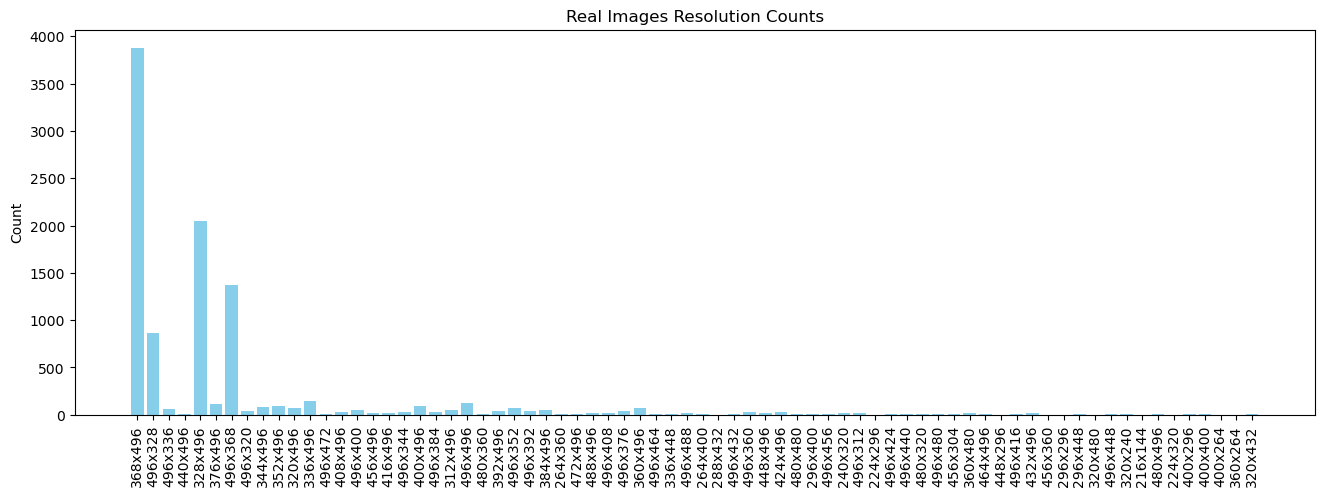

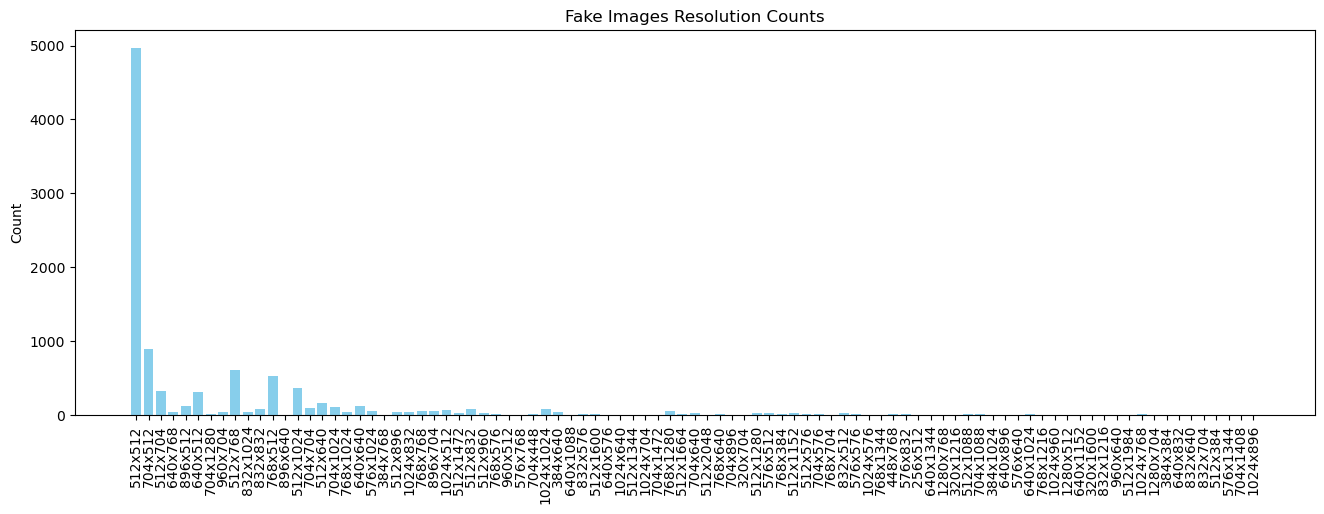

In [15]:
def plot_resolution_counts(resolution_counts, title):
    # 개수가 1인 해상도를 제거
    resolution_counts = {k: v for k, v in resolution_counts.items() if v > 1}
    
    # 해상도와 개수를 분리
    resolutions = list(resolution_counts.keys())
    counts = list(resolution_counts.values())
    
    # 해상도를 문자열로 변환 (e.g., "800x600")
    resolution_labels = [f"{res[0]}x{res[1]}" for res in resolutions]
    
    # 그래프 표시
    plt.figure(figsize=(16, 5))
    plt.bar(resolution_labels, counts, color='skyblue')
    plt.xticks(rotation=90)  # x축 레이블을 90도 회전
    plt.title(title)
    plt.ylabel('Count')
    plt.show()
    
plot_resolution_counts(real_resolution_counts, 'Real Images Resolution Counts')
plot_resolution_counts(fake_resolution_counts, 'Fake Images Resolution Counts')

In [ ]:
def get_image_statistics(image_paths):
    data = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is not None:
            height, width, _ = image.shape
            data.append((height, width, height * width))
    
    df = pd.DataFrame(data, columns=['Height', 'Width', 'Pixel_Count'])
    return df.describe()

# 기술 통계를 가져오고 출력
real_stats = get_image_statistics(real_image_paths)
fake_stats = get_image_statistics(fake_image_paths)

In [17]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("Real Images Statistics")
print(real_stats)
print()
print("Fake Images Statistics")
print(fake_stats)
pd.reset_option('display.float_format')

Real Images Statistics
        Height    Width  Pixel_Count
count 10000.00 10000.00     10000.00
mean    396.55   455.28    176936.60
std      67.76    65.76     17596.10
min      88.00   120.00     11264.00
25%     344.00   368.00    162688.00
50%     368.00   496.00    182528.00
75%     496.00   496.00    182528.00
max     496.00   496.00    246016.00

Fake Images Statistics
        Height    Width  Pixel_Count
count 10000.00 10000.00     10000.00
mean    586.59   614.73    363258.27
std     129.50   194.65    153942.50
min      64.00    64.00      4096.00
25%     512.00   512.00    262144.00
50%     512.00   512.00    262144.00
75%     704.00   704.00    393216.00
max    1600.00  2048.00   1048576.00


# 픽셀 값의 평균 및 표준편차 계산

In [10]:
import cv2
import numpy as np
import pandas as pd

def process_batch(image_paths, start, end):
    total_pixels = 0
    sum_pixels = 0
    sum_squares = 0
    for path in image_paths[start:end]:
        image = cv2.imread(path)
        if image is not None:
            pixels = image.flatten()
            total_pixels += len(pixels)
            sum_pixels += np.sum(pixels)
            sum_squares += np.sum((pixels - np.mean(pixels))**2)  # 수정된 부분
    mean = sum_pixels / total_pixels
    variance = sum_squares / total_pixels  # 수정된 부분
    std = np.sqrt(variance)
    return {'Mean': mean, 'Std': std}

def process_images_in_batches(image_paths, batch_size):
    num_batches = len(image_paths) // batch_size
    all_stats = {key: [] for key in ['Mean', 'Std']}
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        batch_stats = process_batch(image_paths, start, end)
        for key, value in batch_stats.items():
            all_stats[key].append(value)
    return pd.DataFrame(all_stats).describe()

# 1000장씩 배치 처리하여 통계를 계산
real_stats = process_images_in_batches(real_image_paths, 1000)
fake_stats = process_images_in_batches(fake_image_paths, 1000)


In [11]:
# 결과 출력
print("Real Images Statistics:")
print(real_stats)
print("\nFake Images Statistics:")
print(fake_stats)

Real Images Statistics:
             Mean        Std
count   10.000000  10.000000
mean   110.515608  62.788786
std      0.800816   0.248016
min    108.927798  62.489997
25%    110.493221  62.580380
50%    110.743496  62.804391
75%    110.827829  62.884211
max    111.691849  63.187137

Fake Images Statistics:
             Mean        Std
count   10.000000  10.000000
mean   103.666855  63.419630
std      0.882080   0.406647
min    102.633641  62.764627
25%    103.091894  63.197146
50%    103.530237  63.421250
75%    103.905171  63.646881
max    105.637036  64.017682


# 푸리에 스펙트럼 분석

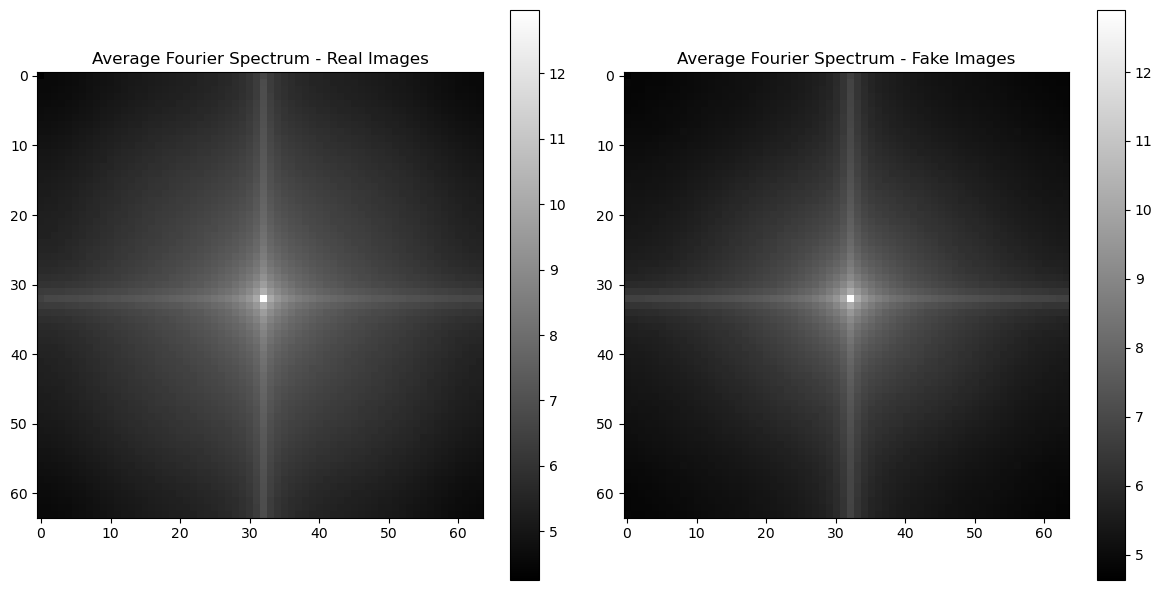

In [27]:
def center_crop(img, target_size=(256, 256)):
    # 이미지의 중앙에서 target_size만큼 크롭한다.
    y, x = img.shape
    cy, cx = y // 2, x // 2
    dy, dx = target_size[0] // 2, target_size[1] // 2
    
    return img[cy - dy:cy + dy, cx - dx:cx + dx]

def compute_fourier_transform(image_path, target_size=(64, 64)):
    # 이미지를 그레이스케일로 불러온다
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at {image_path}")
    
    # 이미지 크기가 target_size보다 작은 경우 경로를 출력한다.
    if img.shape[0] < target_size[0] or img.shape[1] < target_size[1]:
        print(f"Image with path {image_path} has size {img.shape}")
    
    # 이미지를 중앙에서 target_size만큼 크롭한다.
    img = center_crop(img, target_size)
    
    # 이미지의 푸리에 변환을 계산한다
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    
    return magnitude_spectrum

def average_fourier_transform(image_paths):
    # 주어진 모든 이미지의 푸리에 변환의 평균을 계산한다
    sum_spectrum = 0
    for image_path in image_paths:
        sum_spectrum += compute_fourier_transform(image_path)
    avg_spectrum = sum_spectrum / len(image_paths)
    return avg_spectrum

# 실제 이미지와 가짜 이미지의 평균 푸리에 스펙트럼을 계산한다
real_avg_spectrum = average_fourier_transform(real_image_paths)
fake_avg_spectrum = average_fourier_transform(fake_image_paths)

# 결과를 시각화한다
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(real_avg_spectrum, cmap='gray')
plt.title("Average Fourier Spectrum - Real Images")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(fake_avg_spectrum, cmap='gray')
plt.title("Average Fourier Spectrum - Fake Images")
plt.colorbar()

plt.tight_layout()
plt.show()

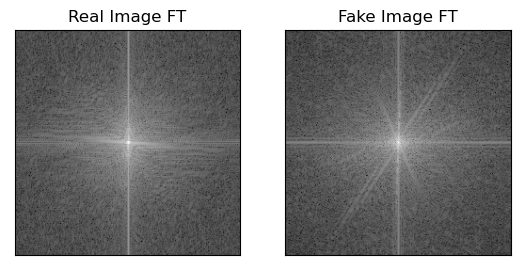

In [29]:
def apply_fourier_transform(image_path):
    # 이미지를 grayscale로 로드
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # 이미지 중앙 240x240 크롭
    h, w = image.shape
    cropped_image = image[h//2-120:h//2+120, w//2-120:w//2+120]
    
    # 푸리에 변환
    f = np.fft.fft2(cropped_image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    
    return magnitude_spectrum

# 가짜 이미지와 진짜 이미지 각각의 푸리에 변환 결과를 저장할 리스트
real_images_ft = []
fake_images_ft = []

# 진짜 이미지의 푸리에 변환 결과 계산
for path in real_image_paths:
    real_images_ft.append(apply_fourier_transform(path))

# 가짜 이미지의 푸리에 변환 결과 계산
for path in fake_image_paths:
    fake_images_ft.append(apply_fourier_transform(path))

# 결과 출력 (예시로 첫 번째 진짜 이미지와 첫 번째 가짜 이미지의 푸리에 변환 결과를 표시)
plt.subplot(121),plt.imshow(real_images_ft[0], cmap = 'gray')
plt.title('Real Image FT'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(fake_images_ft[0], cmap = 'gray')
plt.title('Fake Image FT'), plt.xticks([]), plt.yticks([])
plt.show()

# 주성분 분석 (PCA)

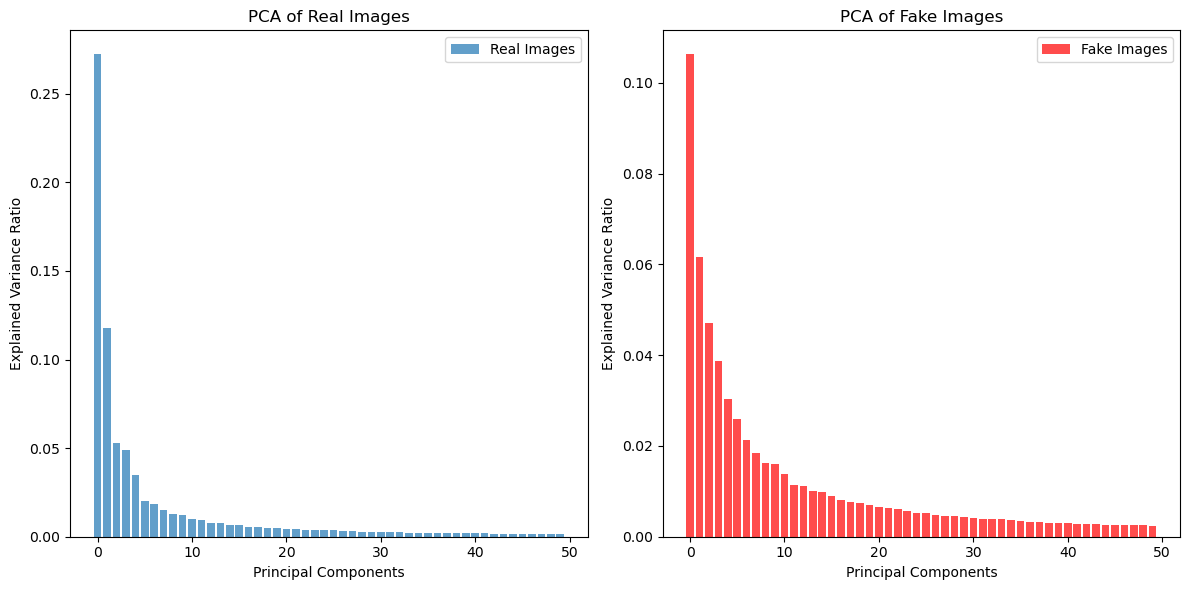

In [32]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 이미지 불러오기 및 전처리 함수
def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # 흑백 이미지로 불러오기
        img = cv2.resize(img, (240, 240))  # 이미지 크기 조정
        images.append(img)
    return np.array(images)

# PCA 수행 및 분산 설명 비율 반환 함수
def perform_pca(images, n_components=50):
    images_reshaped = images.reshape(images.shape[0], -1)
    pca = PCA(n_components=n_components)
    pca.fit(images_reshaped)
    return pca.explained_variance_ratio_

# 이미지 경로
real_image_paths = [f'../train/real_images/real_{str(i).zfill(5)}.png' for i in range(10000)]
fake_image_paths = [f'../train/fake_images/fake_{str(i).zfill(5)}.png' for i in range(10000)]

# 이미지 불러오기
real_images = load_and_preprocess_images(real_image_paths)
fake_images = load_and_preprocess_images(fake_image_paths)

# PCA 수행
n_components = 50
real_variance = perform_pca(real_images, n_components)
fake_variance = perform_pca(fake_images, n_components)

# 시각화
plt.figure(figsize=(12, 6))

# Real Images PCA Results
plt.subplot(1, 2, 1)
plt.bar(range(n_components), real_variance, alpha=0.7, align='center', label='Real Images')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA of Real Images')
plt.legend()

# Fake Images PCA Results
plt.subplot(1, 2, 2)
plt.bar(range(n_components), fake_variance, alpha=0.7, align='center', color='r', label='Fake Images')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA of Fake Images')
plt.legend()

plt.tight_layout()
plt.show()